# Importing the Dependencies

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv("../data/raw/train.csv")

In [67]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [69]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [70]:
df.isnull().sum()   

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Data Cleaning 

In [71]:
df_cleaned = df.copy()

In [72]:
df_cleaned.drop(['Customer ID','Customer Name','Row ID','Order ID','Country','Product ID'], axis=1, inplace=True)

In [73]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], dayfirst=True, errors='coerce')
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], dayfirst=True, errors='coerce')

In [74]:
df_cleaned.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [75]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# EDA


Month    datetime64[ns]
Sales           float64
dtype: object
       Month      Sales
0 2015-01-31  14205.707
1 2015-02-28   4519.892
2 2015-03-31  55205.797
3 2015-04-30  27906.855
4 2015-05-31  23644.303


/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/700402265.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/700402265.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipyke

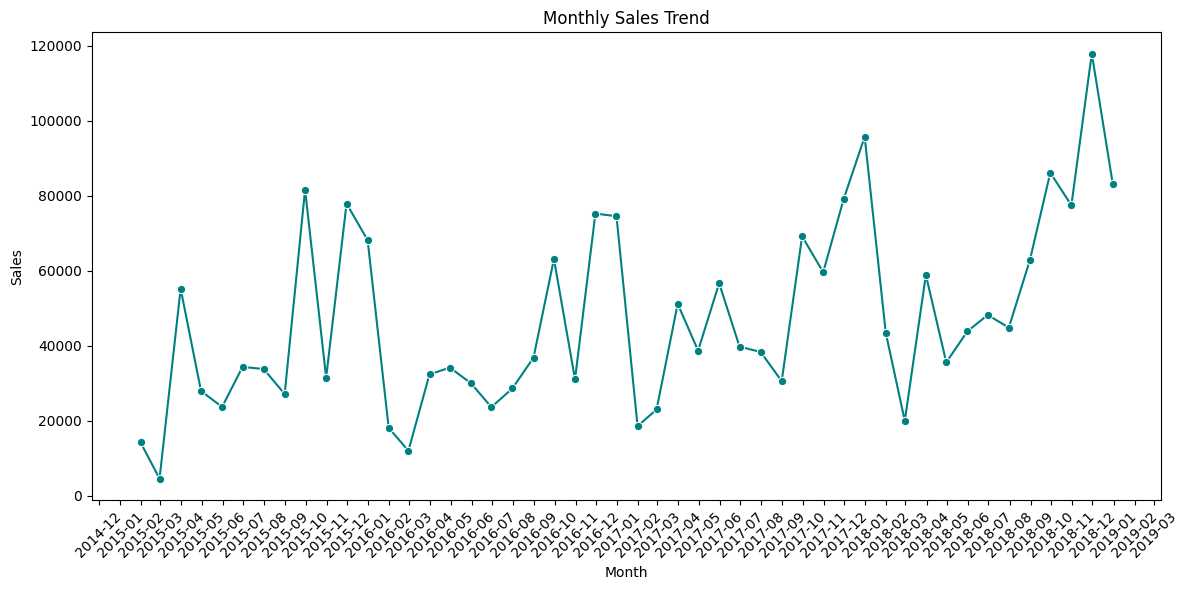

In [87]:
# Monthly sales trend
# Ensure dates and Sales have correct dtypes
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
df_cleaned['Sales'] = pd.to_numeric(df_cleaned['Sales'], errors='coerce')

# Drop rows without an Order Date
df_for_ts = df_cleaned.dropna(subset=['Order Date'])

# Resample by month (month-end) and sum Sales
monthly_sales = (
    df_for_ts.set_index('Order Date')
    .resample('M')['Sales']
    .sum()
    .reset_index()
    .rename(columns={'Order Date': 'Month'})
)

# Drop rows where Sales is NaN (if any)
monthly_sales = monthly_sales.dropna(subset=['Sales'])

# Sanity check
print(monthly_sales.dtypes)
print(monthly_sales.head())

# Plot
import matplotlib.dates as mdates
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='teal')
plt.title('Monthly Sales Trend')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/1170238560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales',palette='coolwarm')


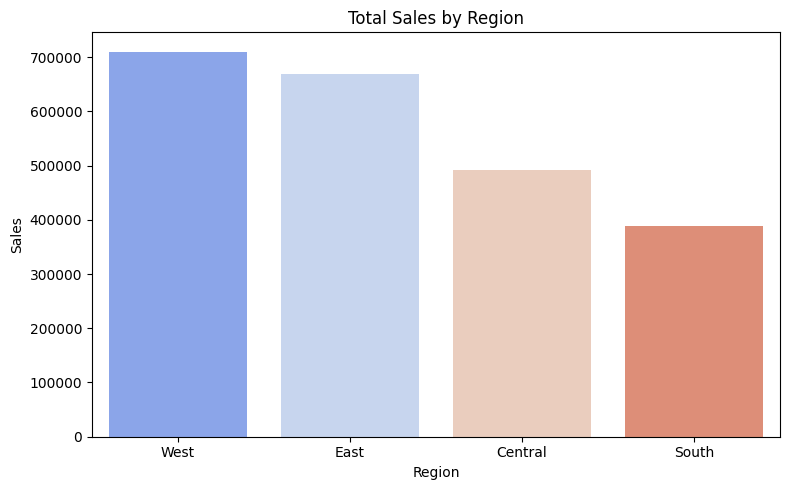

In [77]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x='Region', y='Sales',palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/2209505346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Sales', palette='coolwarm')


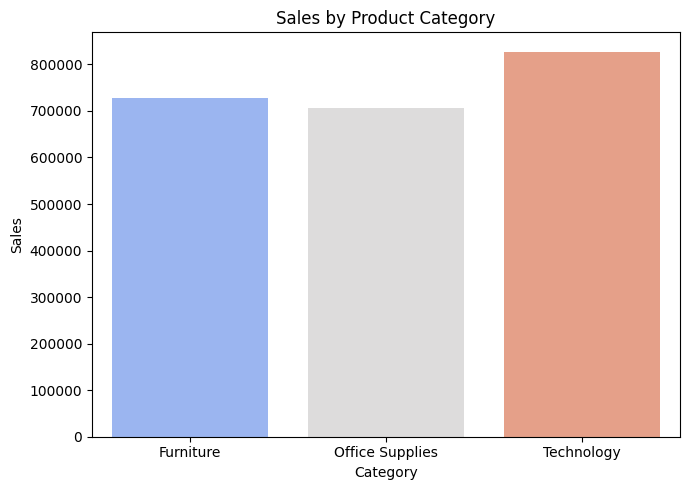

In [78]:
# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='coolwarm')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/585865424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_sales, x='Sub-Category', y='Sales', palette='cubehelix')


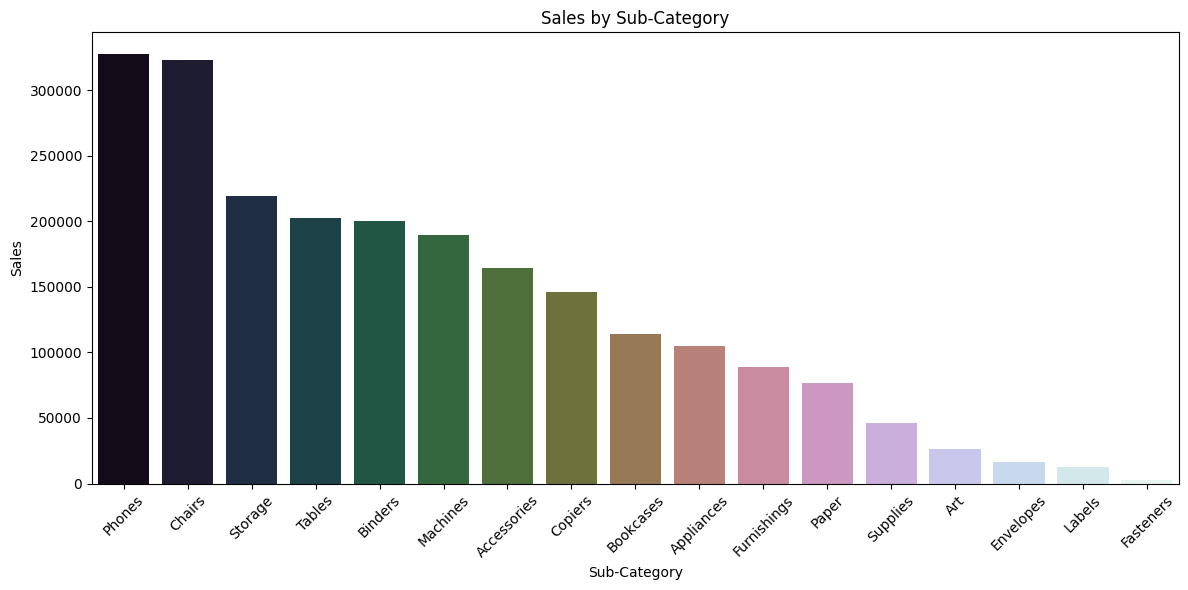

In [79]:
#sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=subcat_sales, x='Sub-Category', y='Sales', palette='cubehelix')
plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/21001496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Sales', y='State', palette='mako')


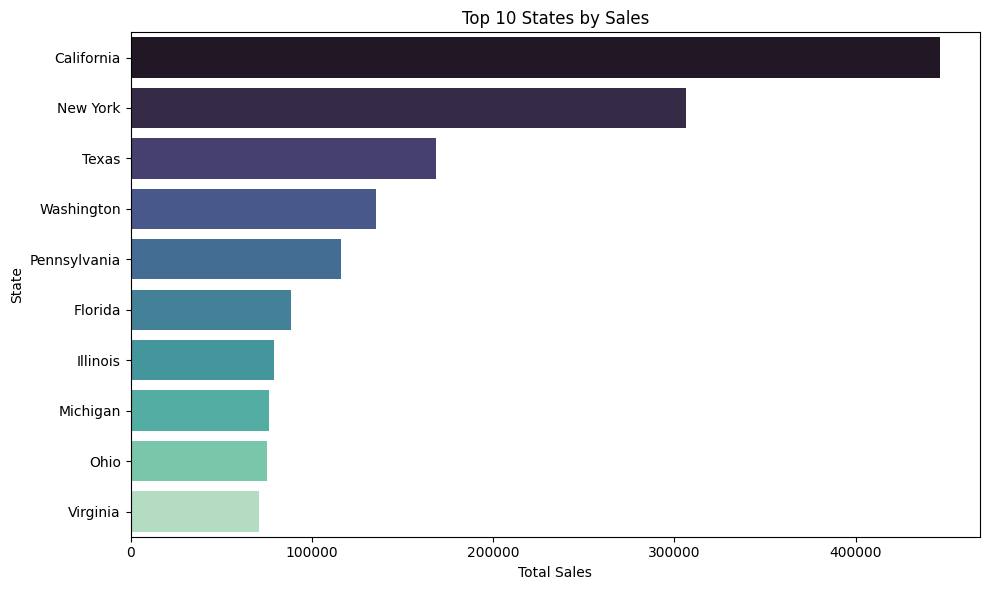

In [80]:
#top 10 States by Sales

top_states = df.groupby('State')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='Sales', y='State', palette='mako')
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/1754649590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ship Mode', palette='Set2')


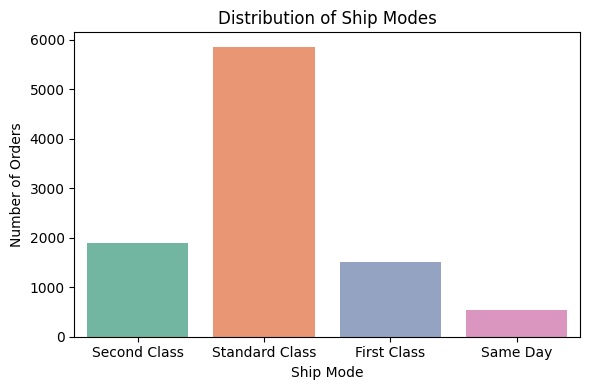

In [81]:
#ship mode preference
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Ship Mode', palette='Set2')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_69569/3879352664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='pastel')


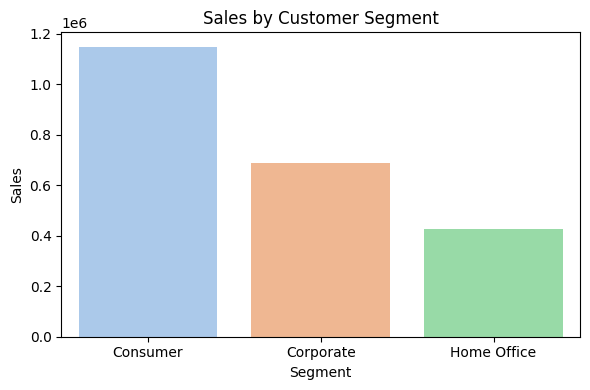

In [82]:
#segment-wise sales distribution
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='pastel')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

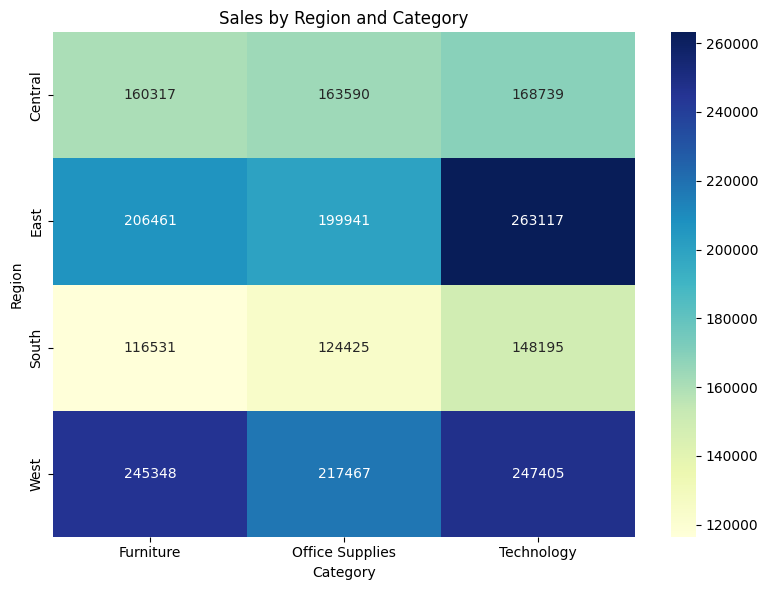

In [83]:
#Sales Heatmap by Region and Category
heat_data = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(heat_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales by Region and Category')
plt.tight_layout()
plt.show()

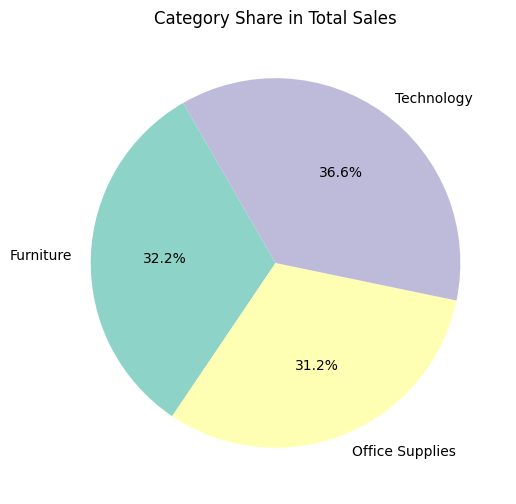

In [84]:
#Category share in total sales

plt.figure(figsize=(6,6))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=120, colors=sns.color_palette('Set3'))
plt.title('Category Share in Total Sales')
plt.show()

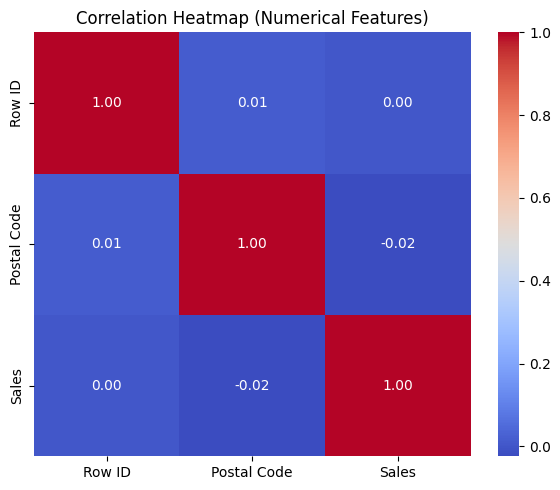

In [85]:
#corr heatmap
num_df = df.select_dtypes(include='number')

plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

In [86]:
df_cleaned.to_csv("cleaned_superstore.csv", index=False)